Name: Yamini M
Roll No: 24BAD131
Accuracy: 0.97847533632287
Precision: 0.9256756756756757
Recall: 0.9133333333333333
F1 Score: 0.9194630872483222


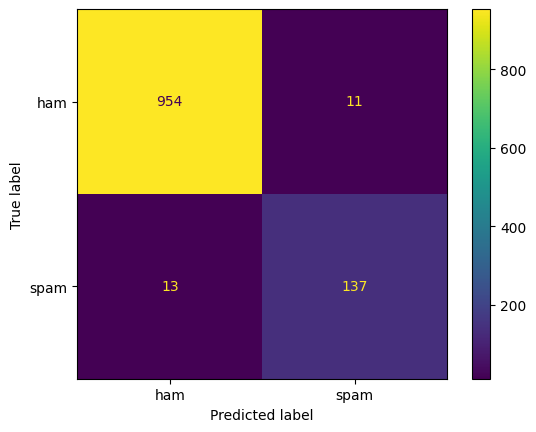

Top Spam Words: ['service' 'contact' 'tone' 'win' 'urgent' 'send' 'nokia' 'cash' 'new'
 'won' 'just' 'prize' 'reply' 'text' 'stop' 'claim' 'mobile' 'ur' 'txt'
 'free']


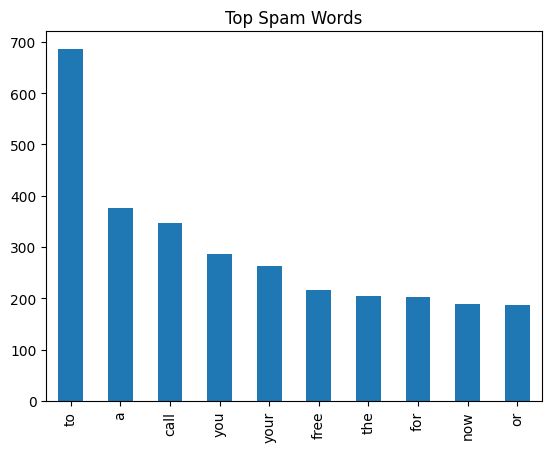

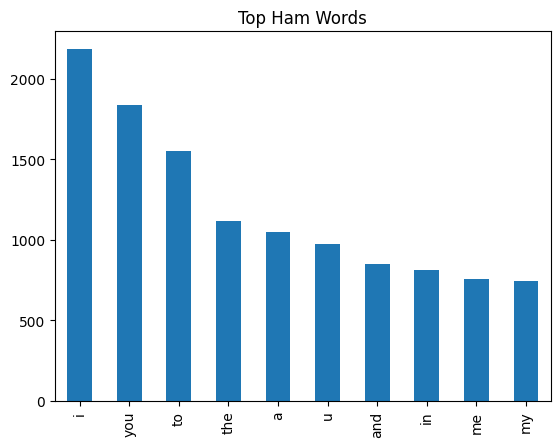

In [ ]:
print("Name: Yamini M")
print("Roll No: 24BAD131")

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv("spam.csv", encoding="latin-1")[['v1','v2']]
df.columns = ['label','message']

df['message'] = df['message'].str.lower()
df['message'] = df['message'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['message'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB(alpha=1.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=le.classes_).plot()
plt.show()

feature_names = np.array(vectorizer.get_feature_names_out())
spam_class_index = 1
top_spam_words = feature_names[np.argsort(model.feature_log_prob_[spam_class_index])[-20:]]

print("Top Spam Words:", top_spam_words)

spam_words = df[df['label']==1]['message'].str.split(expand=True).stack().value_counts().head(10)
ham_words = df[df['label']==0]['message'].str.split(expand=True).stack().value_counts().head(10)

plt.figure()
spam_words.plot(kind='bar')
plt.title("Top Spam Words")
plt.show()

plt.figure()
ham_words.plot(kind='bar')
plt.title("Top Ham Words")
plt.show()


Name: Yamini M
Roll No: 24BAD131
Gaussian NB Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


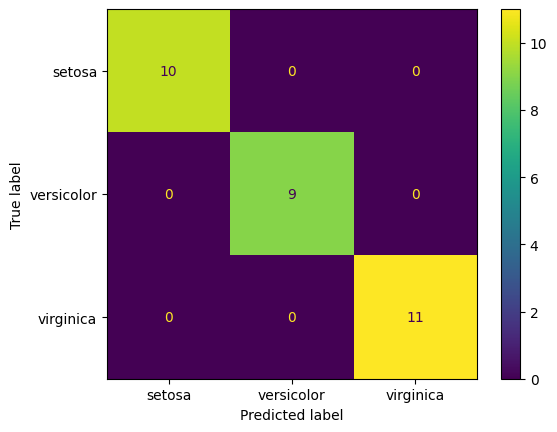

Class Probabilities (First 5 Samples):
[[5.97322611e-090 9.95635768e-001 4.36423247e-003]
 [1.00000000e+000 4.96157683e-014 6.54921950e-021]
 [7.31861098e-290 4.92947289e-012 1.00000000e+000]
 [2.81838335e-094 9.77593560e-001 2.24064404e-002]
 [1.13876385e-105 8.70022604e-001 1.29977396e-001]]
Logistic Regression Accuracy: 1.0


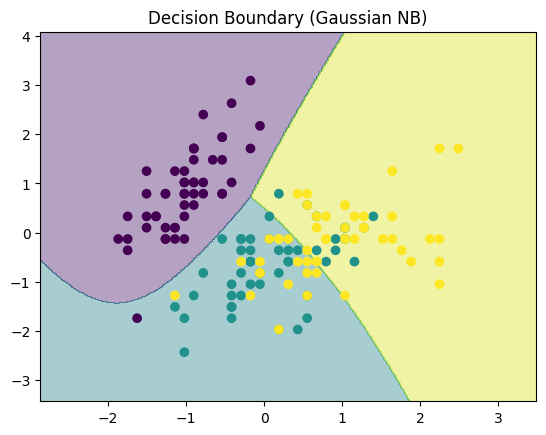

In [ ]:
print("Name: Yamini M")
print("Roll No: 24BAD131")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print("Gaussian NB Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=iris.target_names).plot()
plt.show()

probs = gnb.predict_proba(X_test[:5])
print("Class Probabilities (First 5 Samples):")
print(probs)

lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

X_two = X[:, :2]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_two, y, test_size=0.2, random_state=42)

gnb2 = GaussianNB()
gnb2.fit(X_train2, y_train2)

x_min, x_max = X_two[:, 0].min() - 1, X_two[:, 0].max() + 1
y_min, y_max = X_two[:, 1].min() - 1, X_two[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = gnb2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_two[:, 0], X_two[:, 1], c=y)
plt.title("Decision Boundary (Gaussian NB)")
plt.show()
